In [1]:
# spectral tensor train decomposition page 20
import numpy as np 
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import pandas as pd
from pandas import DataFrame, read_csv

params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 12,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': False,
   }
mpl.rcParams.update(params)

sns.set_style("whitegrid")
sns.despine()

<Figure size 432x288 with 0 Axes>

 - ## Logitstic function

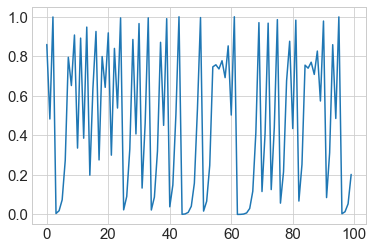

In [5]:
def gen_ts(h0, T):
    ts = []
    h1 = h0
    for i in range(T):
        h2 = 4 * h1 * (1-h1) 
        h1 = np.copy(h2)
        ts.append(h1)
    return ts

def gen_dat(N, T):
    dat = np.empty((N,T,1))
    init_batch = np.random.uniform(0.0,1.0,(N,))

    for i in range(N):
        h0 = init_batch[i]
        dat[i,:,0] = np.asarray(gen_ts(h0, T))
    return dat

N = int(1e3)
T = 100

dat = gen_dat(N, T)
np.save('data_logistic.npy', dat)

data = np.load('data_logistic.npy')
# data.shape
fig = plt.plot(data[1,:,0].T)

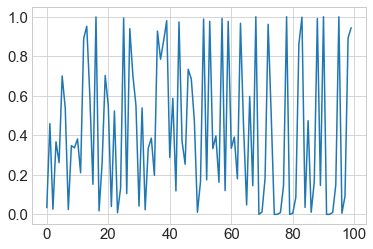

In [6]:
def gen_ts(h0, T):
    ts = []
    h1 = h0
    for i in range(T):
        meta =  4 * h1 * (1-h1) 
        h2 = 16*h1*(1-h1) * (1 - 4*h1*(1-h1)) 
        h1 = np.copy(h2)
        ts.append(h1)
    return ts

def gen_dat(N, T):
    dat = np.empty((N,T,1))
    init_batch = np.random.uniform(0.0,1.0,(N,))

    for i in range(N):
        h0 = init_batch[i]
        dat[i,:,0] = np.asarray(gen_ts(h0, T))
    return dat

N = int(1e3)
T = 100

dat = gen_dat(N, T)
np.save('data_logisq.npy', dat)

data = np.load('data_logisq.npy')
# data.shape
fig = plt.plot(data[1,:,0].T)

- ## Uniform Random Variable

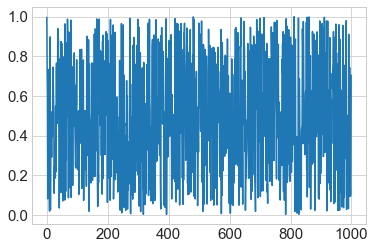

In [11]:
def gen_dat(N, T):
    return np.random.rand(N,T,1)

N = int(1e3)
T = 1000

dat = gen_dat(N, T)
np.save('data_rand.npy', dat)

data = np.load('data_rand.npy')
data.shape
fig = plt.plot(data[0,:,0].T)

- ## AR(p) series

-7.577750288645412 0.9997370310696541


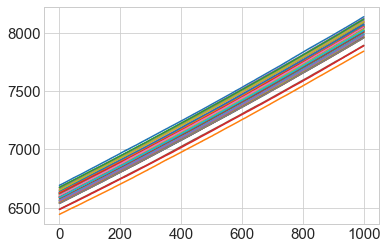

In [262]:
p = 2
warm = 10000
mu = 0.0

beta = np.array([0.86829775, 0.132])
r1 = (beta[0]+np.sqrt(beta[0]**2 + 4*beta[1]))/(-2*beta[1])
r2 = (beta[0]-np.sqrt(beta[0]**2 + 4*beta[1]))/(-2*beta[1])

# stationary = False
# while not stationary:
#     beta = np.random.rand(p)
#     r1 = (beta[0]+np.sqrt(beta[0]**2 + 4*beta[1]))/(-2*beta[1])
#     r2 = (beta[0]-np.sqrt(beta[0]**2 + 4*beta[1]))/(-2*beta[1])
#     if abs(r1)>1.0 and abs(r2)>1.0:
#         stationary = True
print(r1, r2)

def gen_ts(x_lag, coeff, t):
    ts = []
    for _ in range(warm):
        avg = np.dot(x_lag, coeff)
        xt = avg + np.random.rand()
        x_lag = np.append(x_lag, xt); x_lag = np.delete(x_lag, 0)
    for _ in range(t):
        avg = np.dot(x_lag, coeff)
        xt = avg + np.random.rand()
        x_lag = np.append(x_lag, xt); x_lag = np.delete(x_lag, 0)
        ts.append(xt)
    return ts

def gen_dat(N, t):
    x_lags = np.random.rand(N, p)
    
    dat = np.empty((N,t,1))
    for i in range(N):
        x_lag = x_lags[i,:]
        dat[i,:,0] = np.asarray(gen_ts(x_lag, beta, t))
        
    return dat
    


N = 1000
T = 1000
dat = gen_dat(N, T)
np.save('data_ar2_nonstationary.npy', dat)

dat = np.load('data_ar2_nonstationary.npy')
# dat.shape
fig = plt.plot(dat[0:50,:,0].T)

- ## MA(q) series

[0.60885252 0.69861593 0.77321491 0.01671992]


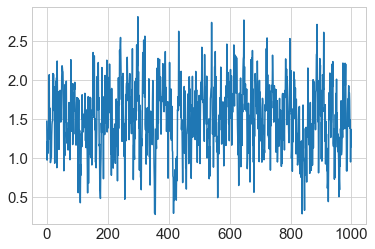

In [252]:
q = 4
mu = 0.0

alpha = np.random.rand(q)
print(alpha)

def gen_ts(ep, coeff, t):
    ts = []
    for _ in range(t):
        avg = np.dot(ep, coeff)
        ept = np.random.rand()
        ep = np.append(ep, ept); ep = np.delete(ep, 0)
        ts.append(avg + ept)
    return ts

def gen_dat(N, t):
    eps = np.random.rand(N, q)
    
    dat = np.empty((N,t,1))
    for i in range(N):
        ep = eps[i,:]
        dat[i,:,0] = np.asarray(gen_ts(ep, alpha, t))
        
    return dat
    


N = 1000
T = 1000
dat = gen_dat(N, T)
np.save('data_ma.npy', dat)

data = np.load('data_ma.npy')
# data.shape
fig = plt.plot(dat[0,:,0].T)

- ## ARMA(p,q) series

-7.592884707740375 1.0


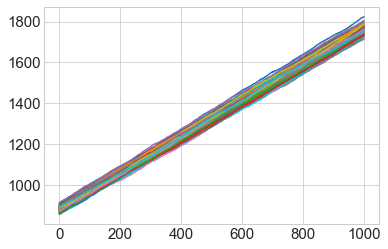

In [266]:
p = 2
q = 4
mu = 0.0
warm = 1000

alpha = np.random.rand(q)
beta = np.array([0.86829775, 0.13170225000000001])
r1 = (beta[0]+np.sqrt(beta[0]**2 + 4*beta[1]))/(-2*beta[1])
r2 = (beta[0]-np.sqrt(beta[0]**2 + 4*beta[1]))/(-2*beta[1])
# stationary = False
# while not stationary:
#     beta = np.random.rand(p)
#     r1 = (beta[0]+np.sqrt(beta[0]**2 + 4*beta[1]))/(-2*beta[1])
#     r2 = (beta[0]-np.sqrt(beta[0]**2 + 4*beta[1]))/(-2*beta[1])
#     if abs(r1)>1.0 and abs(r2)>1.0:
#         stationary = True
print(r1, r2)

def gen_ts(x_lag, ep, coeffB, coeffA, t):
    ts = []
    for _ in range(warm):
        avg = np.dot(x_lag, coeffB) + np.dot(ep, coeffA)
        ept = np.random.rand()
        xt = avg + ept
        x_lag = np.append(x_lag, xt); x_lag = np.delete(x_lag, 0)
        ep = np.append(ep, ept); ep = np.delete(ep, 0)
    for _ in range(t):
        avg = np.dot(x_lag, coeffB) + np.dot(ep, coeffA)
        ept = np.random.rand()
        xt = avg + ept
        x_lag = np.append(x_lag, xt); x_lag = np.delete(x_lag, 0)
        ep = np.append(ep, ept); ep = np.delete(ep, 0)
        ts.append(xt)
    return ts


def gen_dat(N, t):
    x_lags = np.random.rand(N, p)
    eps = np.random.rand(N,q)
    
    dat = np.empty((N,t,1))
    for i in range(N):
        x_lag = x_lags[i,:]
        ep = eps[i,:]
        dat[i,:,0] = np.asarray(gen_ts(x_lag, ep, beta, alpha, t))
        
    return dat
    


N = 1000
T = 1000
# dat = gen_dat(N, T)
# np.save('data_arma24_unitroot.npy', dat)

dat = np.load('data_arma24_unitroot.npy')
# dat.shape
fig = plt.plot(dat[0:100,:,0].T)

- ## ARCH(q) series

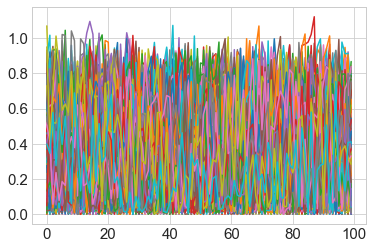

In [53]:
q = 3
warm = 1000
mu = 0.0
alpha = np.random.rand(q+1)

def gen_ts(ep_q, coeff, t):
    ts = []
    for _ in range(warm):
        sig = np.sqrt(np.dot(ep_q, coeff))
        ep_q = np.append(ep_q, np.random.rand()*sig)
        ep_q = np.delete(ep_q, 1)
    for _ in range(t):
        sig = np.sqrt(np.dot(ep_q, coeff))
        yt = np.random.rand()*sig
        ep_q = np.append(ep_q, yt)
        ep_q = np.delete(ep_q, 1)
        ts.append(mu+yt)
    return ts

def gen_dat(N, t):
    eps = np.random.rand(N, q)**2
    dat = np.empty((N,t,1))
    for i in range(N):
        ep = np.insert(eps[i,:], 0, 1)
        dat[i,:,0] = np.asarray(gen_ts(ep, alpha, t))
        
    return dat
    


N = int(1e3)
T = 100
# dat = gen_dat(N, T)
# np.save('data_arch.npy', dat)

data = np.load('data_arch.npy')
# data.shape
fig = plt.plot(data[0:500,:,0].T)

- ## GARCH(p,q) series

[0.26766572 0.84265785 0.34659044 0.02037013]
[0.86829775 0.1341    ]


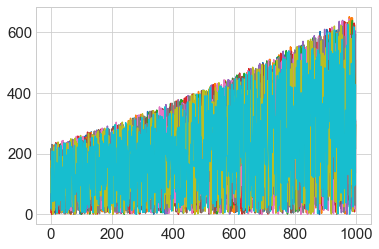

In [95]:
p = 2
q = 3
warm = 1000
mu = 0.0

alpha = np.random.rand(q+1)
beta = np.array([0.86829775,0.1341])


# non_stationary = False
# while not non_stationary:
#     beta = np.random.rand(p)
#     r1 = (beta[0]+np.sqrt(beta[0]**2 + 4*beta[1]))/(-2*beta[1])
#     r2 = (beta[0]-np.sqrt(beta[0]**2 + 4*beta[1]))/(-2*beta[1])
#     if (1-abs(r1))>0 and (1-abs(r1))<0.1 and abs(r2)>1.0:
#         non_stationary = True

print(alpha)
print(beta)

def gen_ts(ep_q, sig_p, coeffA, coeffB, t):
    ts = []
    for _ in range(warm):
        sig = np.dot(ep_q, coeffA) + np.dot(sig_p, coeffB)
        ept = np.random.rand()*np.sqrt(sig)
        ep_q = np.append(ep_q, ept); ep_q = np.delete(ep_q, 1)
        sig_p = np.append(sig_p,sig); sig_p = np.delete(sig_p, 0)
    for _ in range(t):
        sig = np.dot(ep_q, coeffA) + np.dot(sig_p, coeffB)
        ept = np.random.rand()*np.sqrt(sig)
        ep_q = np.append(ep_q, ept); ep_q = np.delete(ep_q, 1)
        sig_p = np.append(sig_p,sig); sig_p = np.delete(sig_p, 0)
        ts.append(mu + ept)
    return ts

def gen_dat(N, t):
    eps = np.random.rand(N, q)**2
    sigs = np.random.rand(N, p)**2   
    
    dat = np.empty((N,t,1))
    for i in range(N):
        ep = np.insert(eps[i,:], 0, 1)
        sig = sigs[i,:]
        dat[i,:,0] = np.asarray(gen_ts(ep, sig, alpha, beta, t))
        
    return dat
    


N = 1000
T = 1000
dat = gen_dat(N, T)
np.save('data_garch.npy', dat)
data = np.load('data_garch.npy')
# data.shape
fig = plt.plot(dat[0:10,:,0].T)

- ## High-frequency stock data

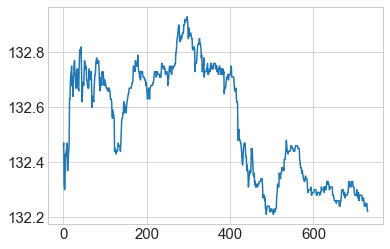

In [278]:
df = pd.read_csv('APPL.csv')
values = df['BUY'].values
dat = np.empty((1,len(values),1))
dat[0,:,0] = np.asarray(values)

np.save('data_stock_hf.npy', dat)
data = np.load('data_stock_hf.npy')
# data.shape
fig = plt.plot(dat[0,:,0].T)

- ## Daily S&P 500 index data

In [281]:
df = pd.read_csv('GSPC_total.csv')
values = df['Close'].values
dat = np.empty((1,len(values),1))
dat[0,:,0] = np.asarray(values)

np.save('data_SP500.npy', dat)
data = np.load('data_SP500.npy')
data.shape
# fig = plt.plot(dat[0,:,0].T)

(1, 17134, 1)